# Introduction to the Low-salt-rejection Reverse Osmosis (LSRRO) Flowsheet
This tutorial shows how to build, initialize, simulate, and optimize an LSRRO flowsheet using WaterTAP.

![alt text](../docs/_static/flowsheets/lsrro.png)

## High-level Preview: Run an LSRRO optimization case. We will specify the following:
* 3-stage system (number_of_stages=3)
* System Water Recovery of 50% (water_recovery=0.50)
* 70 g/L TDS feed (Cin=70) 
* Feed flow rate of 0.001 m3/s (Qin=1e-3)


In [1]:
from watertap.flowsheets.lsrro.lsrro import (
    ACase,
    BCase,
    ABTradeoff,
    run_lsrro_case,
)
import logging
logging.getLogger("idaes").setLevel(logging.ERROR)
logging.getLogger("pyomo").setLevel(logging.ERROR)

In [2]:
m, results = run_lsrro_case(
    number_of_stages=3, # total number of stages
    water_recovery=0.50, # overall water recovery
    Cin=70,  # inlet NaCl conc in kg/m3,
    Qin=1e-3,  # inlet feed flowrate in m3/s
    quick_start=True   # skip rigorous initialization procedure for quick results (increased risk of non-convergence)
)


Feed Concentration = 70.0 ppt

***---Simulation results---***
Simulation failed. The current configuration is infeasible. Please adjust the decision variables.

***---Optimization results---***
----system metrics----
Feed: 1.05 kg/s, 66946 ppm
Product: 0.498 kg/s, 1511 ppm
Brine: 0.548 kg/s, 126470 ppm
Volumetric water recovery: 50.0%
Number of Stages: 3
Total Membrane Area: 319.44
Energy Consumption: 6.3 kWh/m3
Levelized cost of water: 1.54 $/m3
Primary Pump Capital Cost ($/m3):0.4685558390042717
Booster Pump Capital Cost ($/m3): 0.08453309297688603
ERD Capital Cost ($/m3):0.03715961312932659
Membrane Capital Cost ($/m3): 0.16044632535512127
Indirect Capital Cost ($/m3): 0.37534743523280284
Electricity cost ($/m3): 0.44270830493003077


--decision variables--
Stage 1 operating pressure 85.0 bar
Stage 1 membrane area      229.0 m2
Stage 1 water perm. coeff.  1.5 LMH/bar
Stage 1 salt perm. coeff.  0.1 LMH
Stage 2 operating pressure 65.0 bar
Stage 2 membrane area      89.5 m2
Stage 2 wat

## Overview of setting up and optimizing the LSRRO flowsheet--step by step.
* Step 0: Import Python libraries.

* Step 1: Build the LSRRO flowsheet.

* Step 2: Set specifications for LSRRO flowsheet.

* Step 3: Initialize the LSRRO flowsheet.

* Step 4: Optimize the LSRRO flowsheet.

* Step 5: Visualize results.

## Step 0: Import libraries.

In [3]:
# Import LSRRO flowsheet module
from watertap.flowsheets.lsrro import lsrro

## Step 1: Build the LSRRO flowsheet.

In [4]:
# Create a Pyomo concrete model, flowsheet, and NaCl property parameter block.
m = lsrro.build(
    number_of_stages=3,
    has_NaCl_solubility_limit=True,
    has_calculated_concentration_polarization=True,
    has_calculated_ro_pressure_drop=True,
    number_of_RO_finite_elements=10,

)


## Step 2: Set specifications for the LSRRO flowsheet.

In [5]:
lsrro.set_operating_conditions(m)

Feed Concentration = 70.0 ppt


## Step 3: Initialize the LSRRO flowsheet model.

In [6]:
lsrro.initialize(m)

--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
2025-09-16 14:46:33 [INFO] idaes.init.fs.feed: Initialization Complete.
2025-09-16 14:46:33 [INFO] idaes.init.fs.PrimaryPumps[1].control_volume: Initialization Complete
2025-09-16 14:46:33 [INFO] idaes.init.fs.PrimaryPumps[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-16 14:46:34 [INFO] idaes.init.fs.Mixers[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-16 14:46:35 [INFO] idaes.init.fs.ROUnits[1].feed_side: Initialization Complete
2025-09-16 14:46:37 [INFO] idaes.init.fs.ROUnits[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-16 14:46:37 [INFO] idaes.init.fs.EnergyRecoveryDevices[1].control_volume: Initialization Comple

## Step 4: Simulate the LSRRO flowsheet.

In [ ]:
lsrro.solve(m, tee=False)

print("Simulation Results:\n")
lsrro.display_system(m)

Simulation Results:

----system metrics----
Feed: 1.05 kg/s, 66946 ppm
Product: 0.349 kg/s, 751 ppm
Brine: 0.697 kg/s, 100084 ppm
Volumetric water recovery: 35.0%
Number of Stages: 3
Total Membrane Area: 183.33
Energy Consumption: 10.4 kWh/m3
Levelized cost of water: 2.41 $/m3
Primary Pump Capital Cost ($/m3):0.8290266209380903
Booster Pump Capital Cost ($/m3): 0.16734617929012008
ERD Capital Cost ($/m3):0.06539992139610248
Membrane Capital Cost ($/m3): 0.14403584004108508
Indirect Capital Cost ($/m3): 0.6029042808326991
Electricity cost ($/m3): 0.7309236776200411




## Step 5: Optimize the LSRRO flowsheet.

In [10]:
lsrro.optimize_set_up(m,
    water_recovery=0.5,
    A_case=ACase.optimize, # water permeability coefficient
    B_case=BCase.optimize, # salt permeability coefficient
    AB_tradeoff=ABTradeoff.equality_constraint, # water and salt permeability equality constraints
    permeate_quality_limit=1000e-6,
    )
optimization_results = lsrro.solve(m, raise_on_failure=True) 

In [11]:
print("Optimization Results:\n")
lsrro.display_system(m)

Optimization Results:

----system metrics----
Feed: 1.05 kg/s, 66946 ppm
Product: 0.498 kg/s, 1000 ppm
Brine: 0.548 kg/s, 126890 ppm
Volumetric water recovery: 50.0%
Number of Stages: 3
Total Membrane Area: 265.86
Energy Consumption: 7.6 kWh/m3
Levelized cost of water: 1.71 $/m3
Primary Pump Capital Cost ($/m3):0.5047265838517884
Booster Pump Capital Cost ($/m3): 0.1318504520423666
ERD Capital Cost ($/m3):0.04116999386381929
Membrane Capital Cost ($/m3): 0.14321735175018685
Indirect Capital Cost ($/m3): 0.41048219075408054
Electricity cost ($/m3): 0.5323462487411277




## 

## Step 6: Visualize results

In [12]:
from watertap.flowsheets.lsrro.multi_sweep import _lsrro_presweep as setup_sensitivity_sweep
from parameter_sweep import LinearSample, parameter_sweep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyomo.environ import units as pyunits, Expression  


def feed_concentration_recovery_profile(m,number_of_stages, points_per_sweep=5):
    """
    Generate a cost-optimal feed concentration vs recovery profile for a given number of stages.
    Args:

        points_per_sweep (int): Number of points to sample in the sweep.
        number_of_stages (int): Number of RO stages in the system.
    Returns:
        results (pd.DataFrame): DataFrame containing the sweep results.
        output_filename (str): Path to the CSV file where results are saved.
        fig, ax: Matplotlib figure and axis objects for the contour plot.
    """
    output_filename = f"param_sweep_output/{number_of_stages}_stage/results_LSRRO.csv"
    sweep_params = {}
    outputs = {}
    nx = points_per_sweep
    if m is None:
        m = setup_sensitivity_sweep(number_of_stages=number_of_stages)
    else:
        if (m.fs.NumberOfStages == number_of_stages) or (m.fs.NumberOfStages is None):
            pass
        else:
            raise ValueError("Model already exists with a different number of stages. Please pass None as the model argument to create a new model, or pass None as the number_of_stages argument.")
    m.fs.feed.flow_mass_phase_comp.unfix()
    m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"].fix()
    m.fs.feed.properties[0].flow_vol_phase["Liq"].fix()
    # Sweep parameters ------------------------------------------------------------------------

    sweep_params["Feed Concentration"] = LinearSample(m.fs.feed.properties[0].conc_mass_phase_comp["Liq", "NaCl"], 70, 150, nx)

    sweep_params["Volumetric Recovery Rate"] = LinearSample(m.fs.water_recovery, 0.2, 0.5, nx)

        # Outputs  -------------------------------------------------------------------------------
    outputs["LCOW"] = m.fs.costing.LCOW
    outputs["LCOW wrt Feed Flow"] = m.fs.costing.LCOW_feed
    outputs["SEC"] = m.fs.costing.specific_energy_consumption
    outputs["SEC wrt Feed"] = m.fs.costing.specific_energy_consumption_feed
    outputs["Number of Stages"] = m.fs.NumberOfStages
    outputs["Final Brine Concentration"] = m.fs.disposal.properties[
        0
    ].conc_mass_phase_comp["Liq", "NaCl"]
    outputs["Final Permeate Concentration (ppm)"] = (
        m.fs.product.properties[0].mass_frac_phase_comp["Liq", "NaCl"] * 1e6
    )
    outputs["Annual Feed Flow"] = m.fs.annual_feed
    outputs["Annual Water Production"] = m.fs.costing.annual_water_production


    outputs["Pump Work In (kW)"] = m.fs.total_pump_work
    outputs["Pump Work Recovered (kW)"] = m.fs.recovered_pump_work
    outputs["Net Pump Work In (kW)"] = m.fs.net_pump_work
    outputs["Energy Recovery (%)"] = (
        -m.fs.recovered_pump_work / m.fs.total_pump_work * 100
    )

    outputs["Mass Water Recovery Rate (%)"] = m.fs.mass_water_recovery * 100
    outputs["System Salt Rejection (%)"] = m.fs.system_salt_rejection * 100

    outputs["Total Membrane Area"] = m.fs.total_membrane_area
    
    
    outputs["Total Capex LCOW"] = (
        m.fs.costing.total_capital_cost
        * m.fs.costing.capital_recovery_factor
        / m.fs.costing.annual_water_production
    )
    outputs["Total Opex LCOW"] = (
        m.fs.costing.total_operating_cost / m.fs.costing.annual_water_production
    )

    outputs["Primary Pump Capex LCOW"] = m.fs.costing.primary_pump_capex_lcow
    outputs["Booster Pump Capex LCOW"] = m.fs.costing.booster_pump_capex_lcow

    outputs["ERD Capex LCOW"] = m.fs.costing.erd_capex_lcow
    outputs["Membrane Capex LCOW"] = m.fs.costing.membrane_capex_lcow
    outputs["Indirect Capex LCOW"] = m.fs.costing.indirect_capex_lcow
    outputs["Electricity LCOW"] = m.fs.costing.electricity_lcow
    outputs["Membrane Replacement LCOW"] = m.fs.costing.membrane_replacement_lcow
    outputs["Chem-labor-maintenance LCOW"] = (
        m.fs.costing.chemical_labor_maintenance_lcow
    )

    outputs["Pumping Energy Agg LCOW"] = m.fs.costing.pumping_energy_aggregate_lcow
    outputs["Membrane Agg LCOW"] = m.fs.costing.membrane_aggregate_lcow

    outputs.update(
        {
            f"Feed Pressure (psi)-Stage {idx}": pyunits.convert(
                pump.control_volume.properties_out[0].pressure, to_units=pyunits.psi
            )
            for idx, pump in m.fs.PrimaryPumps.items()
        }
    )

    outputs.update(
        {
            f"Pump Feed Flowrate-Stage {idx} (gpm)": pyunits.convert(
                pump.control_volume.properties_out[0].flow_vol_phase['Liq'], to_units=pyunits.gal/pyunits.min
            )
            for idx, pump in m.fs.PrimaryPumps.items()
        }
    )

    outputs.update(
        {
            f"Permeate flowrate-Stage {idx} (gpm)": pyunits.convert(
                stage.mixed_permeate[0].flow_vol_phase["Liq"], to_units=pyunits.gal/pyunits.min
            )
                    for idx, stage in m.fs.ROUnits.items()
               
        }
    )

    outputs.update(
        {
            f"Membrane Area-Stage {idx}": stage.area
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Total Membrane Length-Stage {idx}": stage.length
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Effective Membrane Width-Stage {idx}": stage.width
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Observed Rejection (%)-Stage {idx}": stage.rejection_phase_comp[
                0, "Liq", "NaCl"
            ]
            * 100
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Observed Salt Passage (%)-Stage {idx}": (
                1 - stage.rejection_phase_comp[0, "Liq", "NaCl"]
            )
            * 100
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Mass Salt Passage (%)-Stage {idx}": (
                stage.mixed_permeate[0].flow_mass_phase_comp["Liq", "NaCl"]
                / stage.feed_side.properties[0, 0].flow_mass_phase_comp["Liq", "NaCl"]
            )
            * 100
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Volumetric Module Recovery Rate (%)-Stage {idx}": stage.recovery_vol_phase[
                0, "Liq"
            ]
            * 100
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Mass Water Module Recovery Rate (%)-Stage {idx}": stage.recovery_mass_phase_comp[
                0, "Liq", "H2O"
            ]
            * 100
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Volumetric Stage Recovery Rate (%)-Stage {idx}": m.fs.stage_recovery_vol[
                idx
            ]
            * 100
            for idx in m.fs.Stages
        }
    )

    outputs.update(
        {
            f"Mass Water Stage Recovery Rate (%)-Stage {idx}": m.fs.stage_recovery_mass_H2O[
                idx
            ]
            * 100
            for idx in m.fs.Stages
        }
    )

    outputs.update(
        {
            f"A-Value (LMH/bar)-Stage {idx}": stage.A_comp[0, "H2O"] * 3.6e11
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"B-Value (LMH)-Stage {idx}": stage.B_comp[0, "NaCl"] * 3.6e6
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Average Water Flux (LMH)-Stage {idx}": stage.flux_mass_phase_comp_avg[
                0, "Liq", "H2O"
            ]
            * 3.6e3
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Average NaCl Flux (GMH)-Stage {idx}": stage.flux_mass_phase_comp_avg[
                0, "Liq", "NaCl"
            ]
            * 3.6e6
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Pressure Drop (bar)-Stage {idx}": -pyunits.convert(
                stage.deltaP[0], to_units=pyunits.bar
            )
            for idx, stage in m.fs.ROUnits.items()
        }
    )
    outputs.update(
        {
            f"Inlet Reynolds Number-Stage {idx}": stage.feed_side.N_Re[0, 0]
            for idx, stage in m.fs.ROUnits.items()
        }
    )
    outputs.update(
        {
            f"Outlet Reynolds Number-Stage {idx}": stage.feed_side.N_Re[0, 1]
            for idx, stage in m.fs.ROUnits.items()
        }
    )
    outputs.update(
        {
            f"Inlet Crossflow Velocity-Stage {idx}": stage.feed_side.velocity[0, 0]
            for idx, stage in m.fs.ROUnits.items()
        }
    )
    outputs.update(
        {
            f"Outlet Crossflow Velocity-Stage {idx}": stage.feed_side.velocity[0, 1]
            for idx, stage in m.fs.ROUnits.items()
        }
    )

    outputs.update(
        {
            f"Primary Pump SEC-Stage {idx}": pyunits.convert(
                pump.work_mechanical[0], to_units=pyunits.kW
            )
            / pyunits.convert(
                m.fs.product.properties[0].flow_vol,
                to_units=pyunits.m**3 / pyunits.hr,
            )
            for idx, pump in m.fs.PrimaryPumps.items()
        }
    )

    m.fs.zero_expression = Expression(expr=0.0)

    outputs["Booster Pump SEC-Stage 1"] = m.fs.zero_expression
    outputs.update(
        {
            f"Booster Pump SEC-Stage {idx}": pyunits.convert(
                pump.work_mechanical[0], to_units=pyunits.kW
            )
            / pyunits.convert(
                m.fs.product.properties[0].flow_vol,
                to_units=pyunits.m**3 / pyunits.hr,
            )
            for idx, pump in m.fs.BoosterPumps.items()
        }
    )
    outputs.update(
        {
            f"ERD SEC-Stage 1": pyunits.convert(
                m.fs.EnergyRecoveryDevices[1].work_mechanical[0], to_units=pyunits.kW
            )
            / pyunits.convert(
                m.fs.product.properties[0].flow_vol,
                to_units=pyunits.m**3 / pyunits.hr,
            )
        }
    )
    outputs.update(
        {
            f"ERD SEC-Stage {idx}": m.fs.zero_expression
            for idx in m.fs.IntermediateStages
        }
    )
    if m.fs.FirstStage != m.fs.LastStage:
        outputs.update(
            {
                f"ERD SEC-Stage {m.fs.LastStage}": pyunits.convert(
                    m.fs.EnergyRecoveryDevices[m.fs.LastStage].work_mechanical[0],
                    to_units=pyunits.kW,
                )
                / pyunits.convert(
                    m.fs.product.properties[0].flow_vol,
                    to_units=pyunits.m**3 / pyunits.hr,
                )
            }
        )

    outputs.update(
        {
            f"Net SEC-Stage {idx}": outputs[f"Primary Pump SEC-Stage {idx}"]
            + outputs[f"Booster Pump SEC-Stage {idx}"]
            + outputs[f"ERD SEC-Stage {idx}"]
            for idx in m.fs.Stages
        }
    )

    sweep_sensitivity_results = parameter_sweep(
            m,
            sweep_params,
            outputs,
            csv_results_file_name=output_filename,
            optimize_function=lsrro.solve,
            interpolate_nan_outputs=True,
        )
    results= pd.read_csv(output_filename)

    fig, ax = plt.subplots(1,1, figsize=(8, 12), dpi=300)

    X, Y = np.meshgrid(np.unique(results["# Feed Concentration"].to_numpy()), np.unique(results["Volumetric Recovery Rate"].to_numpy()))

    Z = results["LCOW"].to_numpy().reshape(X.shape)

    cbar = ax.contourf(X,Y,Z,cmap="jet")

    ax.set_xlabel("Feed Concentration (kg/m3)")
    ax.set_ylabel("Volumetric Recovery Rate (%)")

    cbar = fig.colorbar(cbar, ax=ax)
    cbar.set_label("LCOW ($/m3)")
    ax.set_title(f"{number_of_stages}-Stage System");
    contours = ax.contour(X,Y,Z, colors="k")

    ax.clabel(contours)


    return results, output_filename, fig, ax


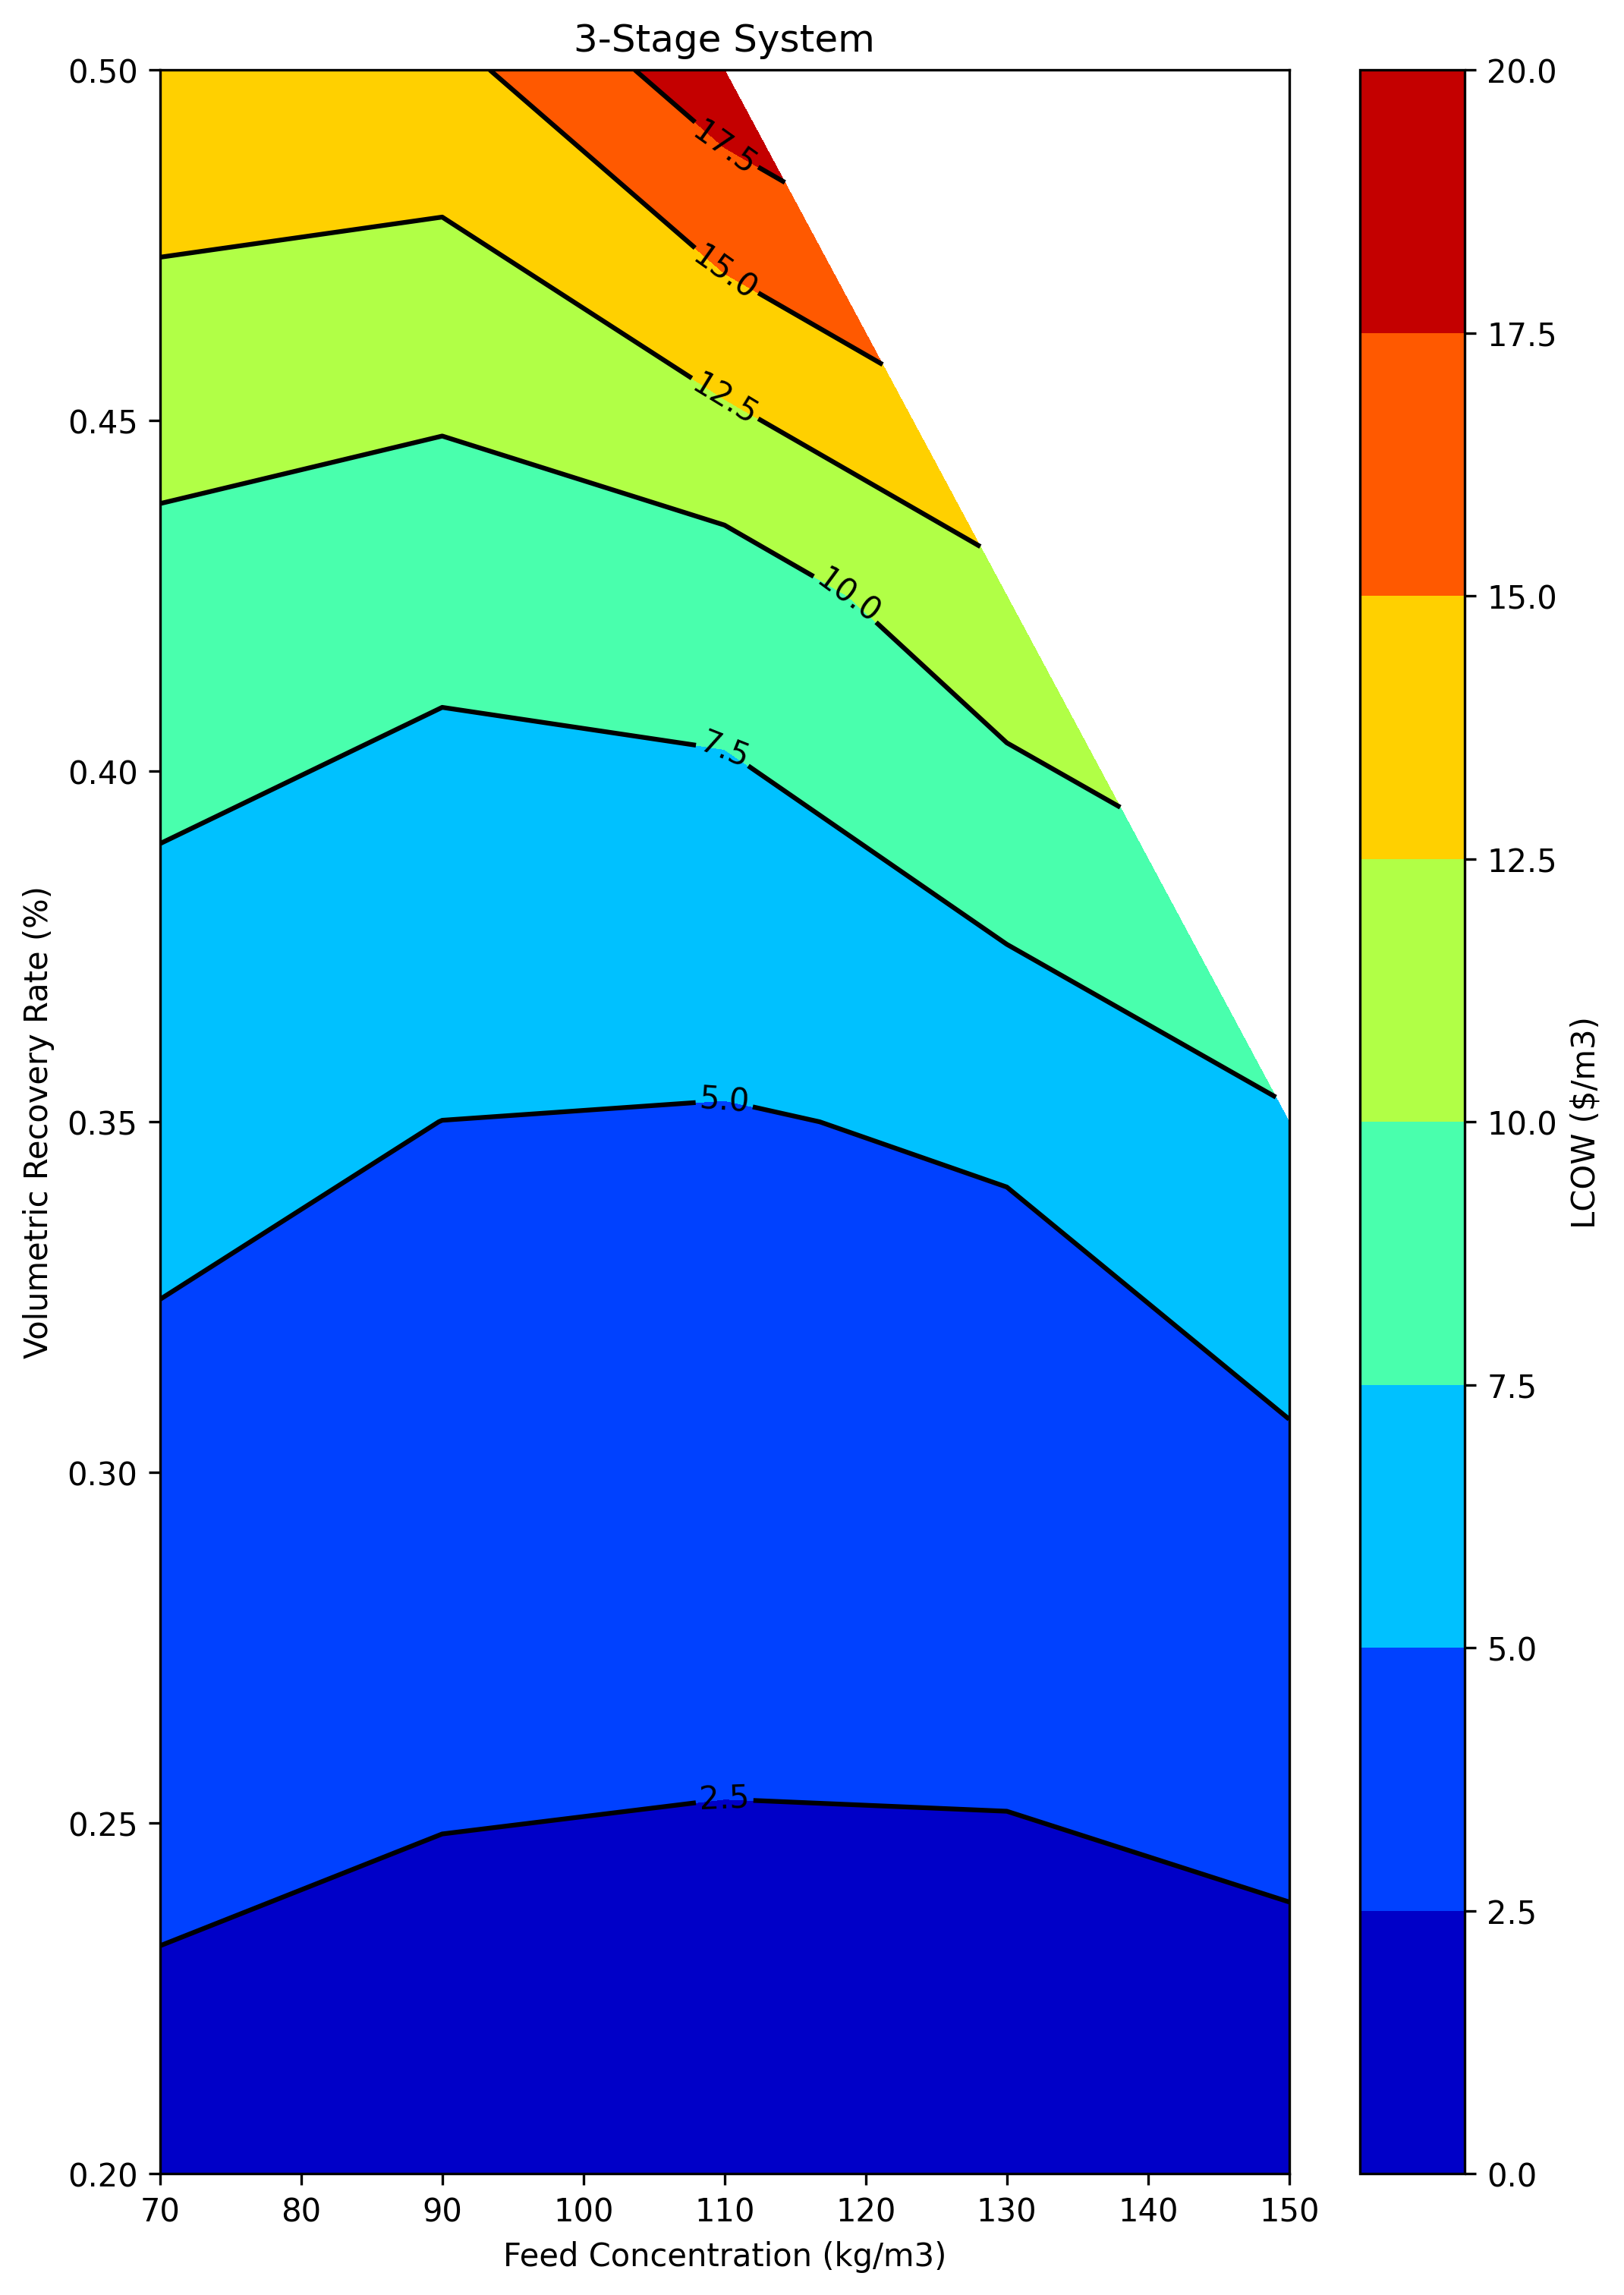

In [13]:
results3, _, fig3, ax3 = feed_concentration_recovery_profile(m=m,number_of_stages=3, points_per_sweep=5)

Feed Concentration = 70.0 ppt
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
--------------------START BACKWARD INITIALIZATION PASS--------------------
--------------------START FORWARD INITIALIZATION PASS--------------------
INFO: Starting Sequential Decomposition
INFO: Starting first pass run of network
2025-09-16 15:10:25 [INFO] idaes.init.fs.feed: Initialization Complete.
2025-09-16 15:10:25 [INFO] idaes.init.fs.PrimaryPumps[1].control_volume: Initialization Complete
2025-09-16 15:10:25 [INFO] idaes.init.fs.PrimaryPumps[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-16 15:10:27 [INFO] idaes.init.fs.Mixers[1]: Initialization Complete: optimal - Optimal Solution Found
2025-09-16 15:10:27 [INFO] idaes.init.fs.ROUnits[1].feed_side: Initialization Complete
2025-09-16 15:10:29 [INFO] idaes.in

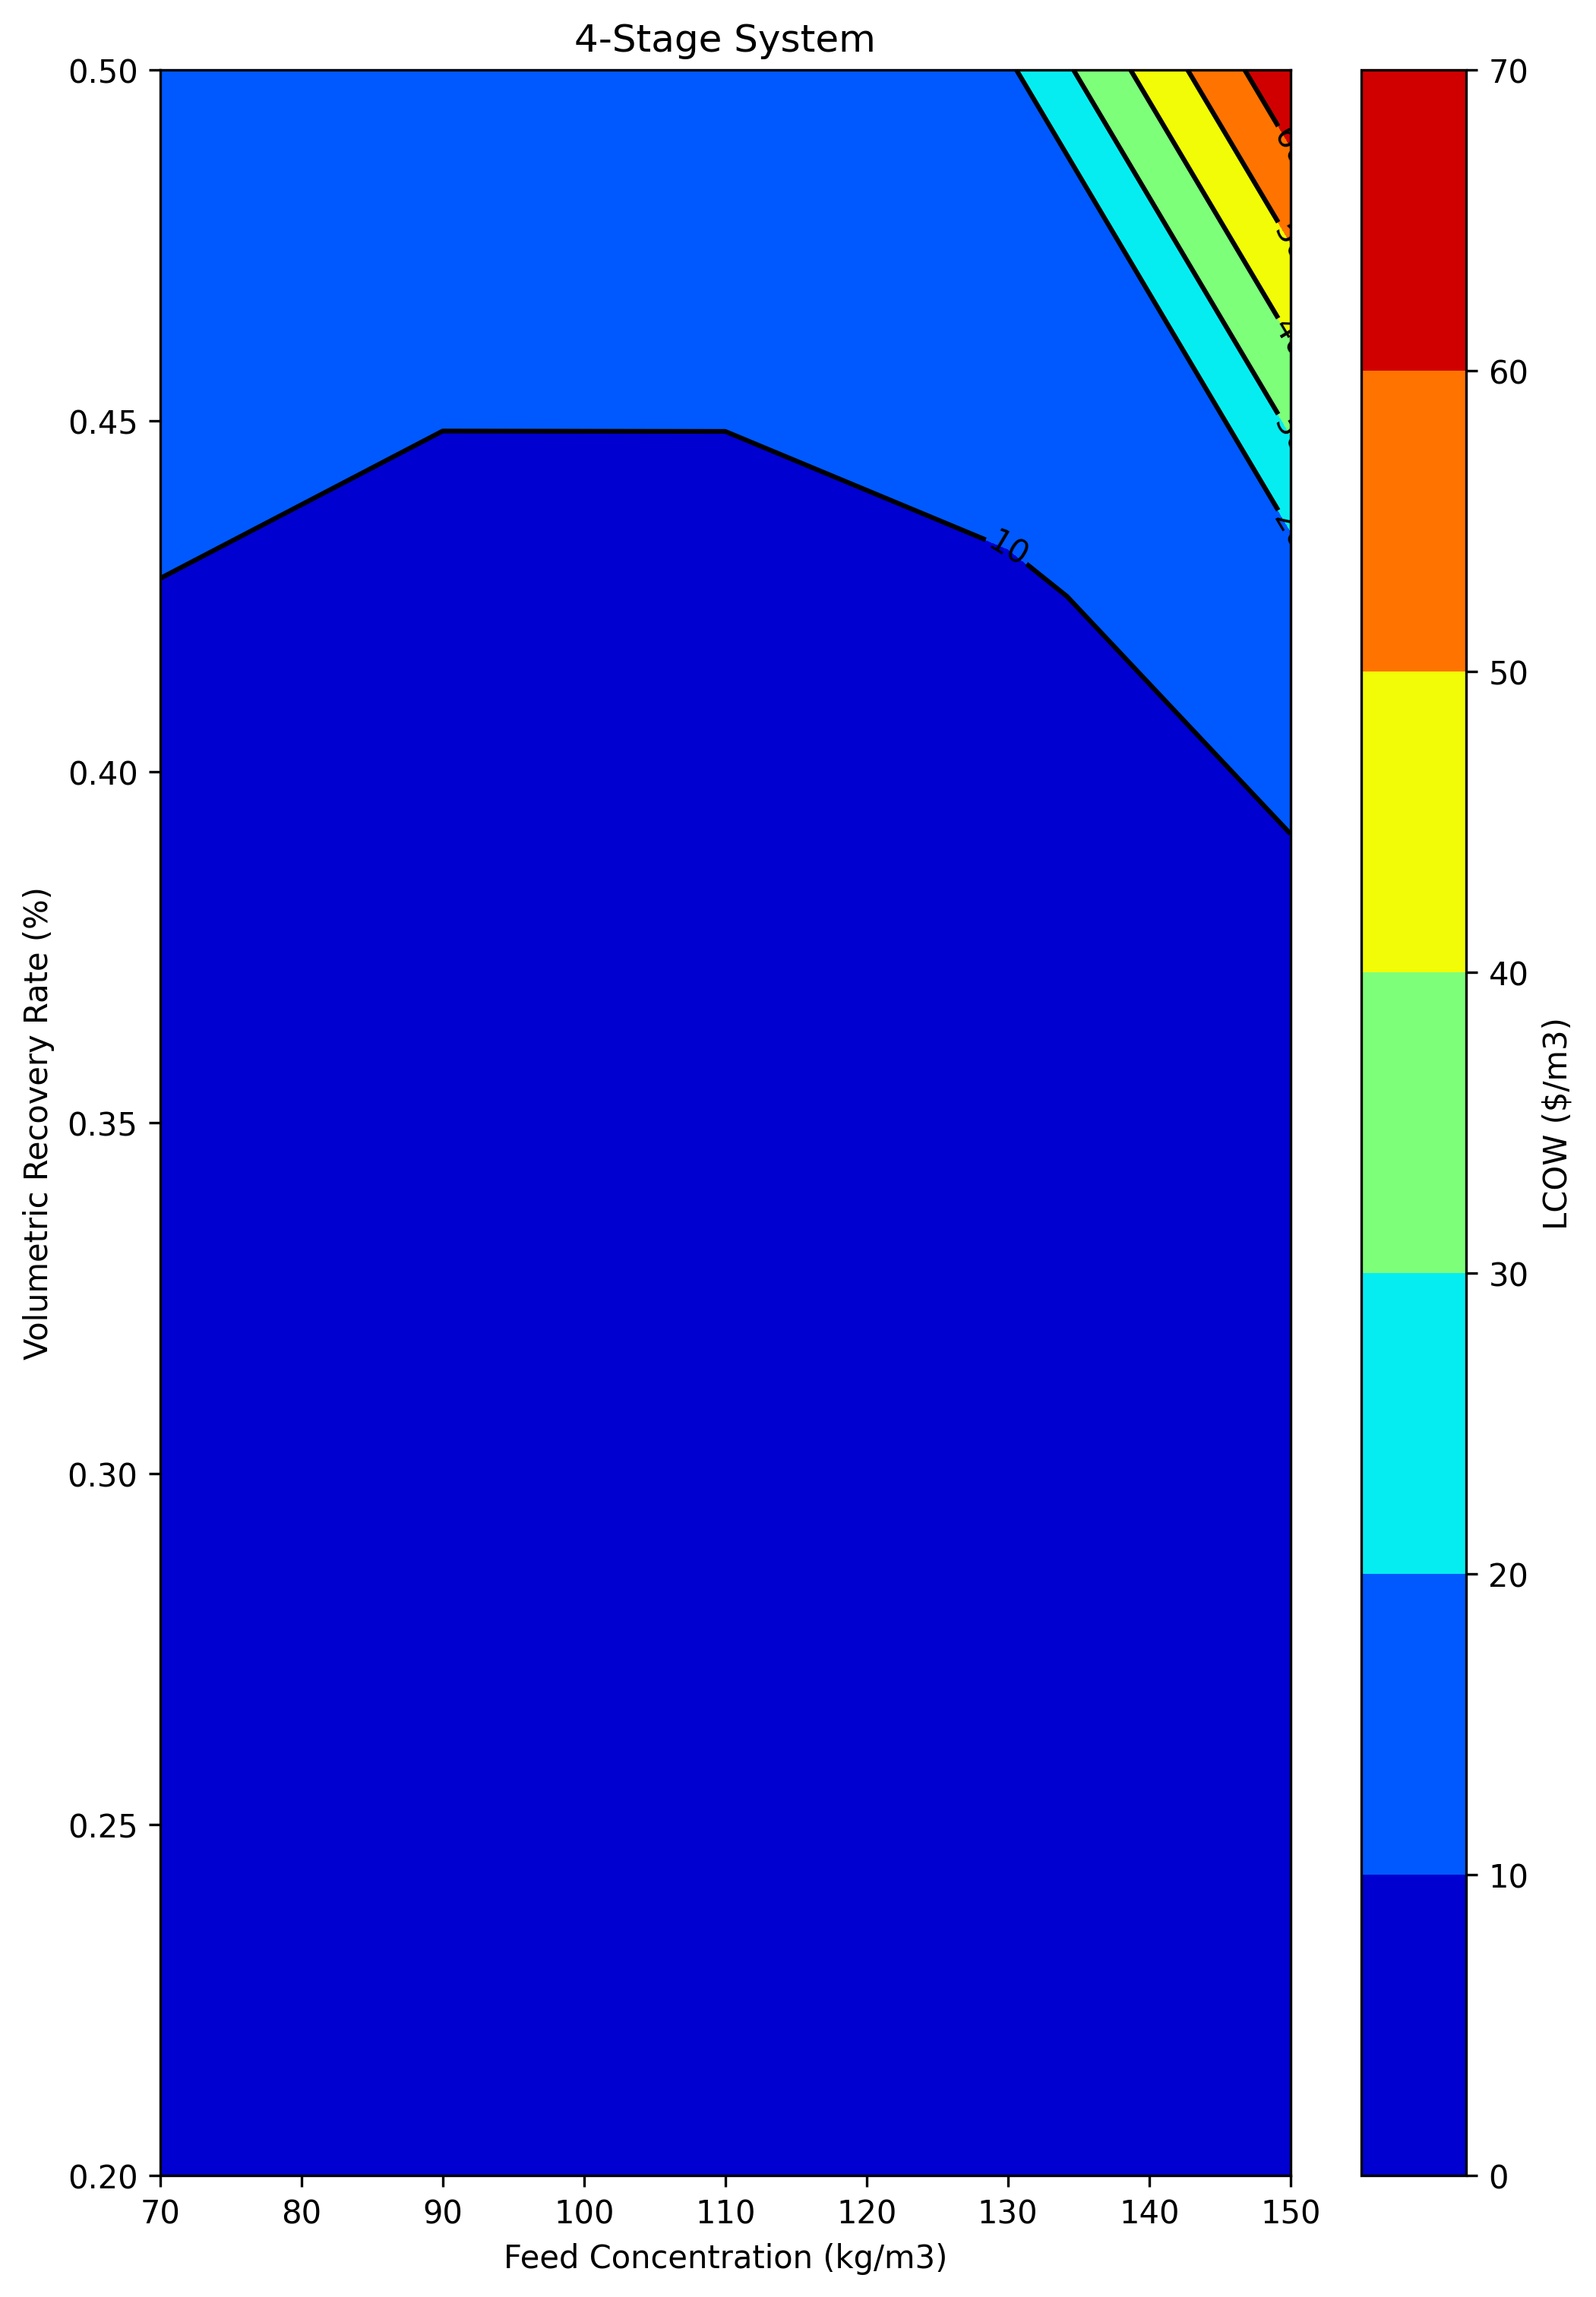

In [14]:
results4, _, fig4, ax4 = feed_concentration_recovery_profile(m=None,number_of_stages=4, points_per_sweep=5)

In [13]:
# TODO: Show bar plots for stage-wise results and possibly LCOW breakdown for 3 and 4 stage cases